In [360]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

import pmdarima as pm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller


In [361]:
zillow =  pd.read_csv('/Users/huwendeng/Desktop/project_time/zillow-carlifornia .csv')

In [362]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [363]:
zillow['Date'] = pd.to_datetime(zillow['Date'])
zillow.set_index('Date', inplace=True)
zillow.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 164 entries, 2004-01-31 to 2017-08-31
Data columns (total 4 columns):
MedianSoldPrice_AllHomes.California      144 non-null float64
MedianMortageRate                        164 non-null float64
UnemploymentRate                         164 non-null float64
MedianRentalPrice_AllHomes.California    92 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [364]:
zillow.head()

,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate,MedianRentalPrice_AllHomes.California
Date,,,,
2004-01-31,326752.55,5.02,7.9,NaN
2004-02-29,329501.50,4.94,7.8,NaN
2004-03-31,340125.45,4.74,7.8,NaN
2004-04-30,355329.50,5.16,7.5,NaN
2004-05-31,367818.15,5.64,7.3,NaN


In [365]:
series=zillow['MedianSoldPrice_AllHomes.California']
series = series[0:144]
print(type(series))
print(series.head())
print(series.size)

<class 'pandas.core.series.Series'>
Date
2004-01-31    326752.55
2004-02-29    329501.50
2004-03-31    340125.45
2004-04-30    355329.50
2004-05-31    367818.15
Name: MedianSoldPrice_AllHomes.California, dtype: float64
144


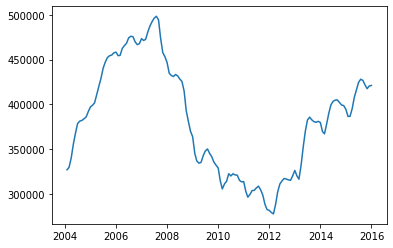

In [366]:
#Time series plot
pyplot.plot(series)
pyplot.show()

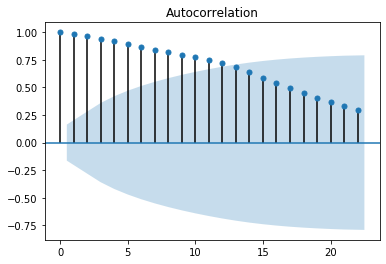

In [367]:
#ACF plot
plot_acf(series) 
plt.show()

In [368]:
#It is not stationary.
#There is an increasing trend based on the series plot. It seems there is no seasonality.

In [369]:
adf_test(series)

Results of Dickey-Fuller Test:
Test Statistic                  -2.768391
p-value                          0.062933
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


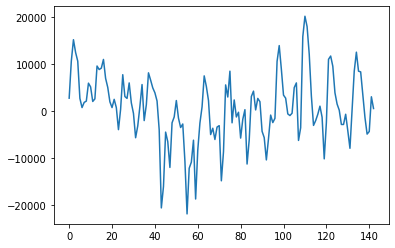

In [370]:
d1 = list()
for i in range(1, len(series)):
 value = series[i] - series[i - 1]
 d1.append(value)

plt.plot(d1) 
pyplot.show()

In [371]:
adf_test(d1)

Results of Dickey-Fuller Test:
Test Statistic                  -1.687305
p-value                          0.437665
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


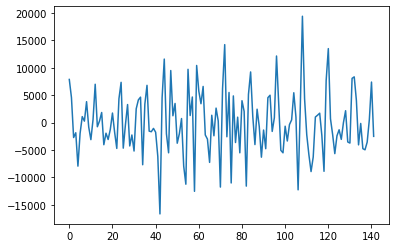

In [372]:
d2 = list()
for i in range(1, len(d1)):
 value = d1[i] - d1[i - 1]
 d2.append(value)

plt.plot(d2) 
pyplot.show()

In [373]:
adf_test(d2)

Results of Dickey-Fuller Test:
Test Statistic                  -4.918846
p-value                          0.000032
#Lags Used                      11.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


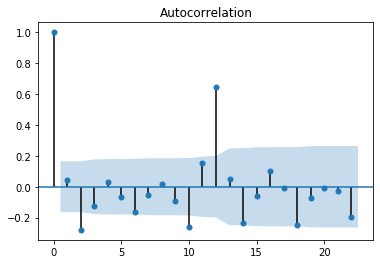

In [374]:
#series acf plot for d=2
plot_acf(pd.Series(d2)) 
plt.show()

In [375]:
#It seems that there exists seasonality.

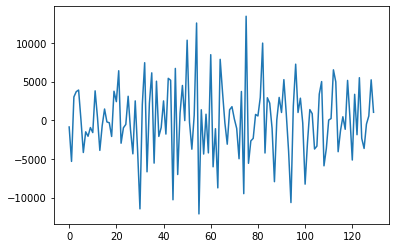

Results of Dickey-Fuller Test:
Test Statistic                  -5.149454
p-value                          0.000011
#Lags Used                      13.000000
Number of Observations Used    116.000000
Critical Value (1%)             -3.488022
Critical Value (5%)             -2.886797
Critical Value (10%)            -2.580241
dtype: float64


In [376]:
d3 = list()
for i in range(12, len(d2)):
 value = d2[i] - d2[i - 12]
 d3.append(value)


plt.plot(d3) 
plt.show()

adf_test(d3)

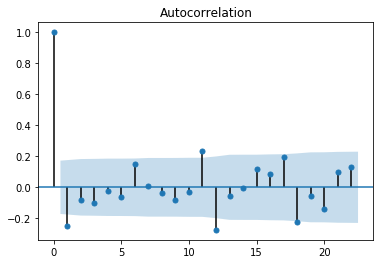

In [377]:
#series acf plot for d=2,D=1
plot_acf(pd.Series(d3)) 
plt.show()

In [378]:
#After the first differencing for seasonality, the seasonality seems to be eliminated.

In [379]:
X = series
train_size = int(len(series) * 0.75)
train, test = X[1:train_size], X[train_size:]

In [380]:
model2 = pm.auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=2, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model2.summary())

Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 1, 1, 12); AIC=1851.580, BIC=1864.243, Fit time=0.244 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 1, 0, 12); AIC=1848.404, BIC=1853.469, Fit time=0.010 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 1, 0, 12); AIC=1849.399, BIC=1859.529, Fit time=0.142 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 1, 1, 12); AIC=1849.589, BIC=1859.719, Fit time=0.136 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 1, 0, 12); AIC=1849.755, BIC=1857.353, Fit time=0.051 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 1, 1, 12); AIC=1849.748, BIC=1857.346, Fit time=0.081 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 1, 1, 12); AIC=1850.581, BIC=1860.711, Fit time=0.264 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 1, 0, 12); AIC=1848.126, BIC=1855.724, Fit time=0.050 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 1, 0, 12); AIC=1849.638, BIC=1859.768, Fit time=0.181 seconds
Fit ARIMA: order=(2, 2, 1) s

In [381]:
#The model was selected is SARIMAX(2, 2, 1)x(0, 1, 0, 12)

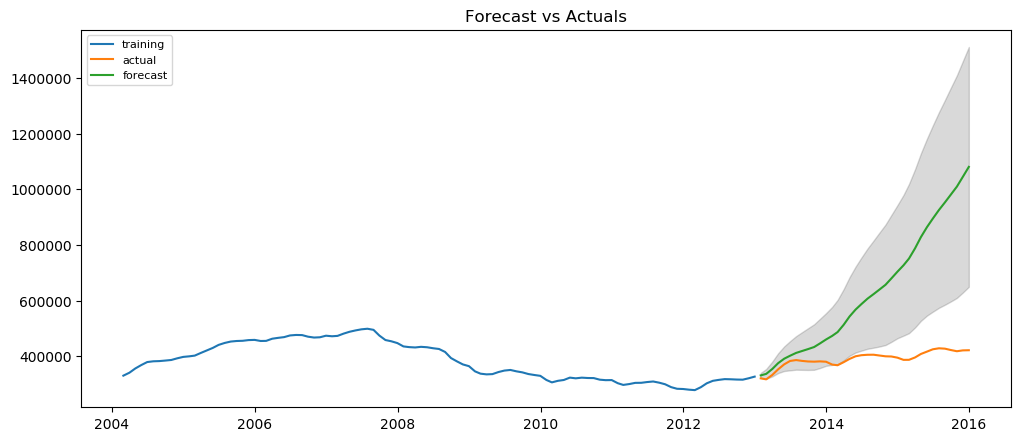

In [382]:
fitted = model2.fit(train)
fc, conf = fitted.predict(len(test),return_conf_int=True,alpha=0.05)
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [383]:
mse = ((fc_series - test) ** 2).mean()
rmse=round(np.sqrt(mse), 2)
print(rmse)

314120.22


In [384]:
residsarima = test-fc_series

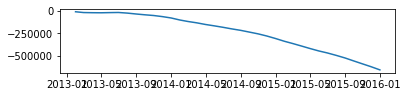

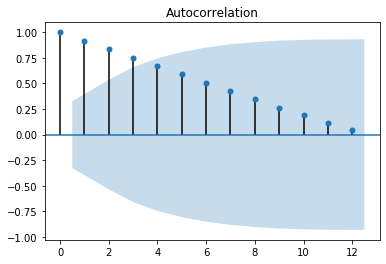

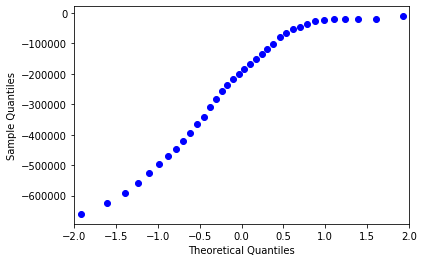

In [385]:
import statsmodels.api as sm
plt.subplot(3,1,1)
plt.plot(residsarima) #stationary
plt.show()
plot_acf(residsarima,lags=12) #uncorrelated
plt.show()
sm.qqplot(residsarima) #normal distribution
plt.show()

In [386]:
#TES model

In [387]:
#TES model
model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12,damped=True)
model2 = ExponentialSmoothing(train, trend="add", seasonal="mul", seasonal_periods=12, damped=True)
model3 = ExponentialSmoothing(train, trend="mul", seasonal="mul", seasonal_periods=12, damped=True)
model4 = ExponentialSmoothing(train, trend="mul", seasonal="add", seasonal_periods=12, damped=True)

fit = model.fit()
pred = fit.forecast(len(test))
fit2 = model2.fit()
pred2 = fit2.forecast(len(test))
fit3 = model3.fit()
pred3 = fit3.forecast(len(test))
fit4 = model4.fit()
pred4 = fit4.forecast(len(test))

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packa

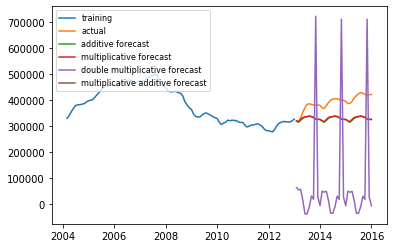

In [388]:
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred, label='additive forecast')
plt.plot(pred2, label='multiplicative forecast')
plt.plot(pred3, label='double multiplicative forecast')
plt.plot(pred4, label='multiplicative additive forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [389]:
rmse1 = np.sqrt(np.mean(np.square(test.values - pred.values)))
rmse2 = np.sqrt(np.mean(np.square(test.values - pred2.values)))
rmse3 = np.sqrt(np.mean(np.square(test.values - pred3.values)))
rmse4 = np.sqrt(np.mean(np.square(test.values - pred4.values)))


print(rmse1)
print(rmse2)
print(rmse3)
print(rmse4)

65924.10419128621
65543.3456660759
374077.61164654215
nan


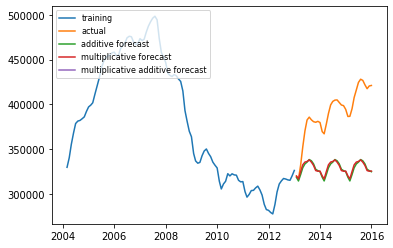

In [391]:
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred, label='additive forecast')
plt.plot(pred2, label='multiplicative forecast')
# plt.plot(pred3, label='double multiplicative forecast')
plt.plot(pred4, label='multiplicative additive forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [288]:
#Structural break test
#structual break at 2009M01

In [392]:
series_before = series[:60]
series_after = series[60:]
# series_before = series[:96]
# series_after = series[96:]

In [393]:
print(type(series_after))
print(series_after.head())
print(series_after.size)

<class 'pandas.core.series.Series'>
Date
2009-01-31    344951.50
2009-02-28    336652.55
2009-03-31    334101.50
2009-04-30    335000.45
2009-05-31    342500.00
Name: MedianSoldPrice_AllHomes.California, dtype: float64
84


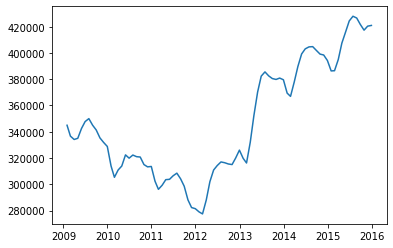

In [394]:
#Time series plot
pyplot.plot(series_after)
pyplot.show()

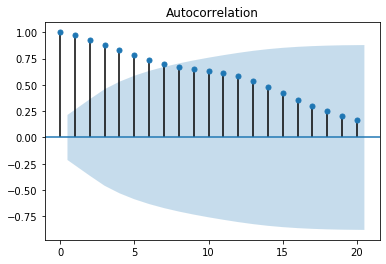

In [395]:
#ACF plot
plot_acf(series_after) 
plt.show()

In [396]:
adf_test(series_after)

Results of Dickey-Fuller Test:
Test Statistic                 -1.573955
p-value                         0.496662
#Lags Used                     12.000000
Number of Observations Used    71.000000
Critical Value (1%)            -3.526005
Critical Value (5%)            -2.903200
Critical Value (10%)           -2.588995
dtype: float64


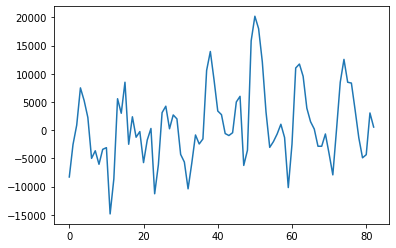

In [397]:
d1 = list()
for i in range(1, len(series_after)):
 value = series_after[i] - series_after[i - 1]
 d1.append(value)

plt.plot(d1) 
pyplot.show()

In [398]:
adf_test(d1)

Results of Dickey-Fuller Test:
Test Statistic                 -1.583221
p-value                         0.492017
#Lags Used                     12.000000
Number of Observations Used    70.000000
Critical Value (1%)            -3.527426
Critical Value (5%)            -2.903811
Critical Value (10%)           -2.589320
dtype: float64


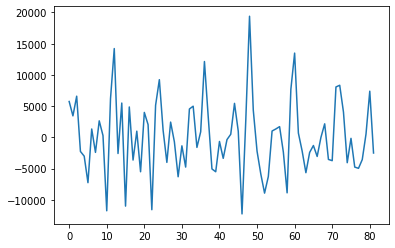

In [399]:
d2 = list()
for i in range(1, len(d1)):
 value = d1[i] - d1[i - 1]
 d2.append(value)

plt.plot(d2) 
pyplot.show()

In [400]:
adf_test(d2)

Results of Dickey-Fuller Test:
Test Statistic                 -3.891110
p-value                         0.002101
#Lags Used                     11.000000
Number of Observations Used    70.000000
Critical Value (1%)            -3.527426
Critical Value (5%)            -2.903811
Critical Value (10%)           -2.589320
dtype: float64


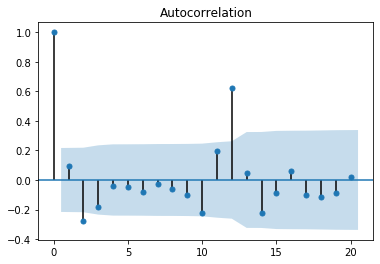

In [421]:
#series acf plot
plot_acf(pd.Series(d2)) 
plt.show()

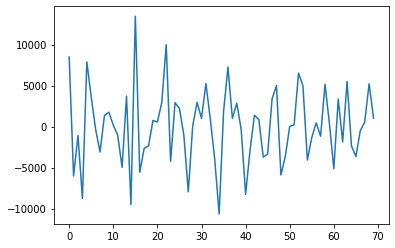

Results of Dickey-Fuller Test:
Test Statistic                 -2.500591
p-value                         0.115331
#Lags Used                     11.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
dtype: float64


In [402]:
# d3 = list()
# for i in range(12, len(d2)):
#  value = d2[i] - d2[i - 12]
#  d3.append(value)


# plt.plot(d3) 
# plt.show()

# adf_test(d3)

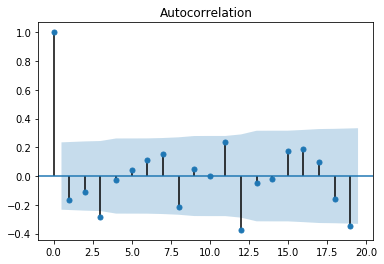

In [403]:
# #series acf plot
# plot_acf(pd.Series(d3)) 
# plt.show()

In [422]:
train_size = int(len(series_after) * 0.75)
train, test = series_after[1:train_size], series_after[train_size:]

In [423]:
model2 = pm.auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=False,
                           d=2, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model2.summary())

Fit ARIMA: order=(1, 2, 1); AIC=1217.738, BIC=1226.115, Fit time=0.107 seconds
Fit ARIMA: order=(0, 2, 0); AIC=1225.557, BIC=1229.745, Fit time=0.003 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1227.389, BIC=1233.672, Fit time=0.048 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1227.132, BIC=1233.415, Fit time=0.018 seconds
Fit ARIMA: order=(2, 2, 1); AIC=1212.894, BIC=1223.366, Fit time=0.153 seconds
Fit ARIMA: order=(2, 2, 0); AIC=1222.803, BIC=1231.181, Fit time=0.086 seconds
Fit ARIMA: order=(2, 2, 2); AIC=1214.794, BIC=1227.360, Fit time=0.214 seconds
Fit ARIMA: order=(3, 2, 2); AIC=nan, BIC=nan, Fit time=0.091 seconds
Fit ARIMA: order=(3, 2, 1); AIC=nan, BIC=nan, Fit time=0.071 seconds
Total fit time: 0.794 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   60
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -601.447
Method:                       css-mle   S.

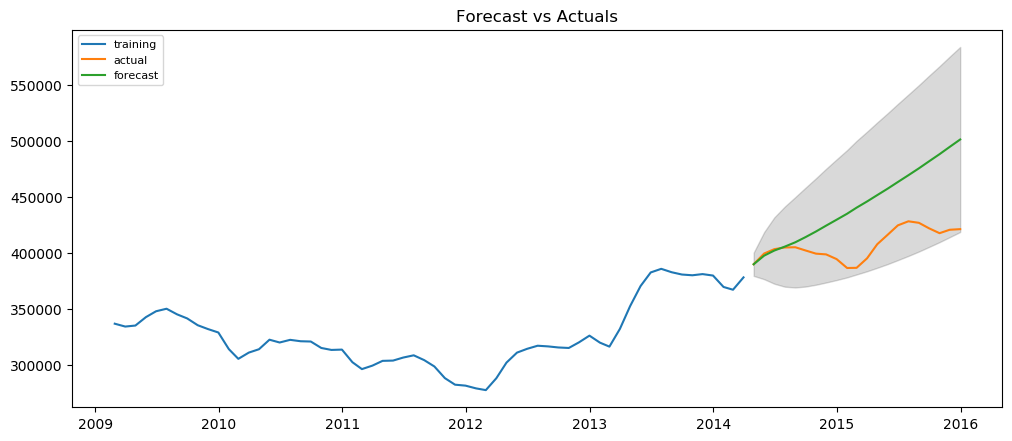

In [424]:
fitted = model2.fit(train)
fc, conf = fitted.predict(len(test),return_conf_int=True,alpha=0.05)
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [425]:
mse = ((fc_series - test) ** 2).mean()
rmse=round(np.sqrt(mse), 2)
print(rmse)

43538.76


In [426]:
#TES model
model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12,damped=True)
model2 = ExponentialSmoothing(train, trend="add", seasonal="mul", seasonal_periods=12, damped=True)
model3 = ExponentialSmoothing(train, trend="mul", seasonal="mul", seasonal_periods=12, damped=True)
model4 = ExponentialSmoothing(train, trend="mul", seasonal="add", seasonal_periods=12, damped=True)

fit = model.fit()
pred = fit.forecast(len(test))
fit2 = model2.fit()
pred2 = fit2.forecast(len(test))
fit3 = model3.fit()
pred3 = fit3.forecast(len(test))
fit4 = model4.fit()
pred4 = fit4.forecast(len(test))

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packa

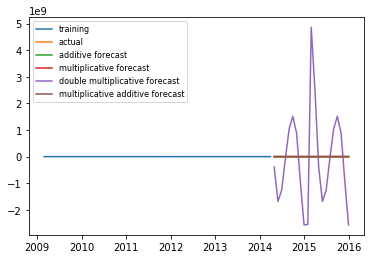

In [428]:
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred, label='additive forecast')
plt.plot(pred2, label='multiplicative forecast')
plt.plot(pred3, label='double multiplicative forecast')
plt.plot(pred4, label='multiplicative additive forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [429]:
rmse1 = np.sqrt(np.mean(np.square(test.values - pred.values)))
rmse2 = np.sqrt(np.mean(np.square(test.values - pred2.values)))
rmse3 = np.sqrt(np.mean(np.square(test.values - pred3.values)))
rmse4 = np.sqrt(np.mean(np.square(test.values - pred4.values)))


print(rmse1)
print(rmse2)
print(rmse3)
print(rmse4)

14583.895511311182
21674.04992513198
1805228890.0531077
7229.810969189716


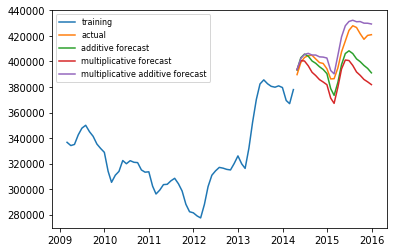

In [430]:
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred, label='additive forecast')
plt.plot(pred2, label='multiplicative forecast')
# plt.plot(pred3, label='double multiplicative forecast')
plt.plot(pred4, label='multiplicative additive forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()